In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w

np.set_printoptions(precision=2)

In [ ]:
# load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']


(99,)

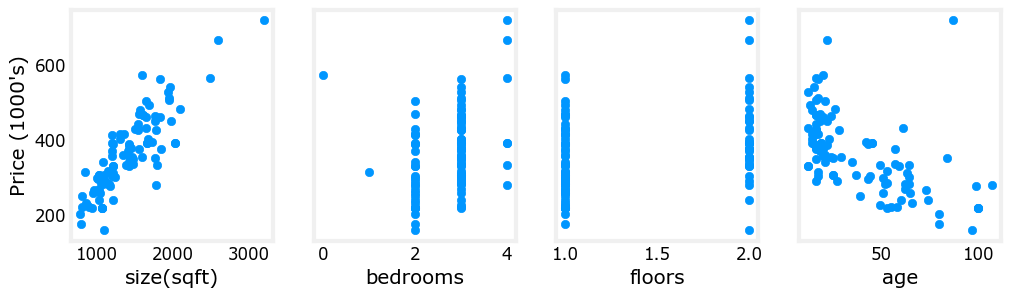

In [5]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [16]:
#set alpha to 9.9e-7
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha = 1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

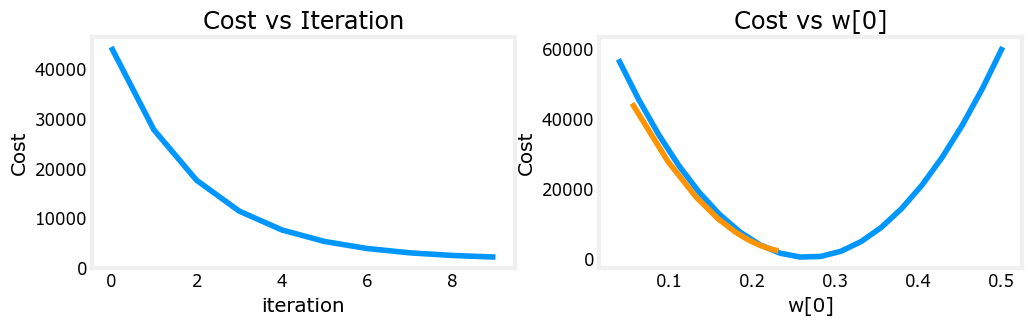

In [18]:
plot_cost_i_w(X_train, y_train, hist)

In [ ]:
#Min max Feature scaling
m,n = X_train.shape
xx = X_train.copy()
yy = y_train.copy()
maxVal = np.zeros(4,)
for i in range(m):
    for j in range(n):
        maxVal[j] = np.max(X_train[:,j])
        maxValy= np.max(y_train)

        xx[i,j] = X_train[i,j]/maxVal[j]
        yy[i]=y_train[i]/maxValy


718.2

C:\Users\Cmos\AppData\Roaming\Python\Python311\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


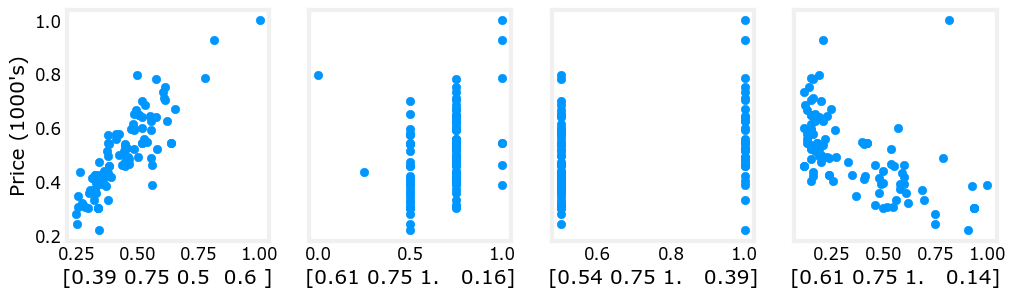

In [48]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(xx[:,i],yy)
    ax[i].set_xlabel(xx[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [75]:
#set alpha to 9.9e-7
_, _, hist = run_gradient_descent(xx, yy, 1000, alpha = 0.05)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 1.10439e-01  1.2e-02  1.8e-02  1.8e-02  8.1e-03  2.5e-02 -2.4e-01 -3.5e-01 -3.6e-01 -1.6e-01 -5.1e-01
      100 7.42427e-03  1.5e-01  1.5e-01  1.5e-01 -1.2e-02  2.3e-01 -9.7e-03 -7.8e-05  1.6e-03  1.5e-02 -2.2e-03
      200 6.08602e-03  2.0e-01  1.5e-01  1.4e-01 -7.7e-02  2.4e-01 -8.6e-03  3.9e-04  2.6e-03  1.1e-02 -2.2e-03
      300 5.21130e-03  2.4e-01  1.5e-01  1.3e-01 -1.3e-01  2.5e-01 -7.8e-03  7.3e-04  3.1e-03  8.3e-03 -2.2e-03
      400 4.59685e-03  2.8e-01  1.5e-01  1.1e-01 -1.6e-01  2.6e-01 -7.2e-03  9.9e-04  3.3e-03  6.2e-03 -2.0e-03
      500 4.13605e-03  3.1e-01  1.4e-01  9.5e-02 -1.9e-01  2.7e-01 -6.7e-03  1.2e-03  3.3e-03  4.6e-03 -1.8e-03
      600 3.77133e-03  3.4e-01  1.3e-01  7.9e-02 -2.1e-01  2.8e-01 -6.3e-03  1.3e-03  3.2e-03  3.4e-03 -

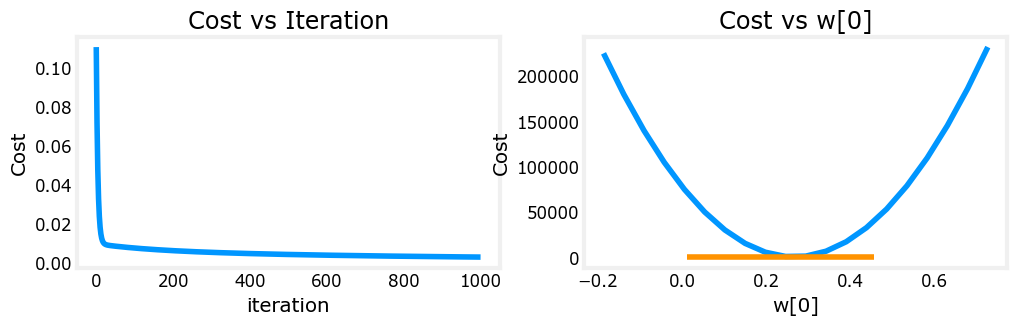

In [76]:
plot_cost_i_w(X_train, y_train, hist)

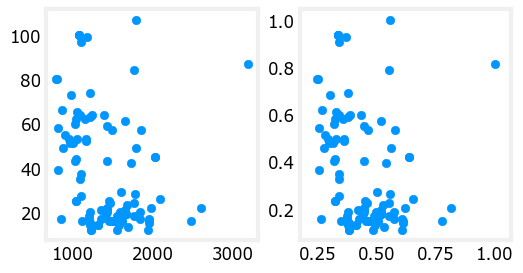

In [93]:
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plt.scatter(X_train[:,0],X_train[:,3])
plt.subplot(1,2,2)
plt.scatter(xx[:,0],xx[:,3])
plt.axis('equal')

# Show the plot
plt.show()# plt.axis('equal')

In [103]:
# Mean Normalization feature scaling
m,n = X_train.shape
maxValx = np.zeros(n)
minValx = np.zeros(n)
xxMN = X_train.copy()
yyMn = y_train.copy()
mu = np.zeros(n)
for j in range(n):
    maxValx[j] = np.max(X_train[:,j])
    minValx[j] = np.min(X_train[:,j])
    mu[j] = np.mean(X_train[:,j])
    for i in range(m):
        xxMN[i,j]=(X_train[i,j]-mu[j])/(maxValx[j]-minValx[j])
        # print(f"x_{i,j} is {xxMN[i,j]}")
    print(f"the max val for col {j} is {maxValx[j]}\nthe min Val for col{j} is {minValx[j]}\nAnd the Mu for this Col{j} is {mu[j]}\n------")


the max val for col 0 is 3194.0
the min Val for col0 is 788.0
And the Mu for this Col0 is 1418.3737373737374
------
the max val for col 1 is 4.0
the min Val for col1 is 0.0
And the Mu for this Col1 is 2.717171717171717
------
the max val for col 2 is 2.0
the min Val for col2 is 1.0
And the Mu for this Col2 is 1.3838383838383839
------
the max val for col 3 is 107.0
the min Val for col3 is 12.0
And the Mu for this Col3 is 38.38383838383838
------


TypeError: 'module' object is not subscriptable

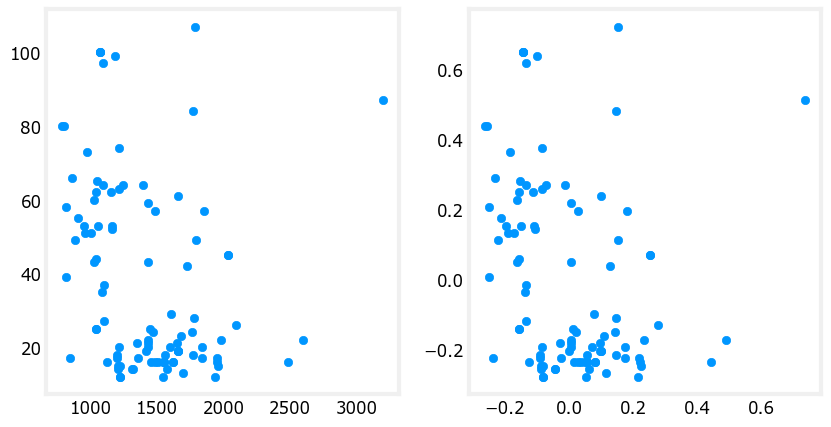

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.scatter(X_train[:,0],X_train[:,3])
plt.subplot(1,2,2)
plt.scatter(xxMN[:,0],xxMN[:,3])
plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Show the plot
plt.show()# plt.axis('equal')

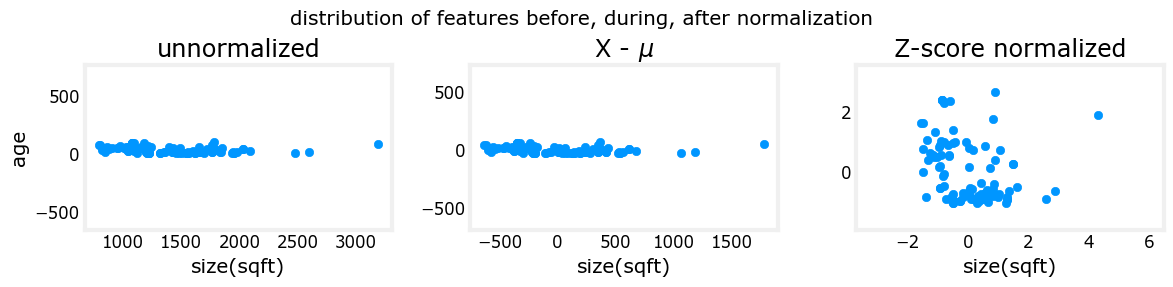

In [111]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

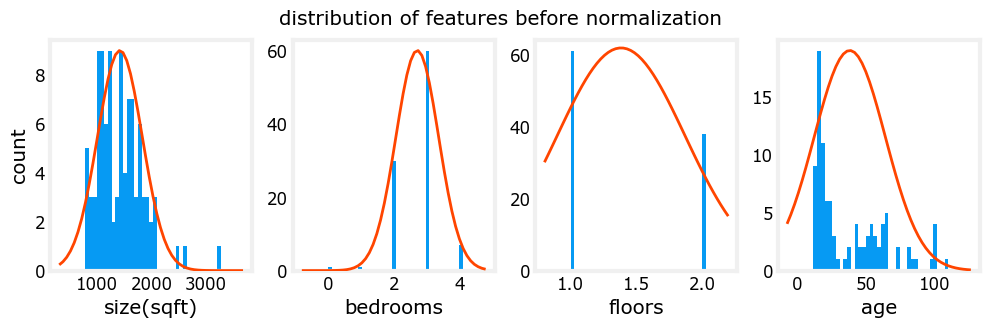

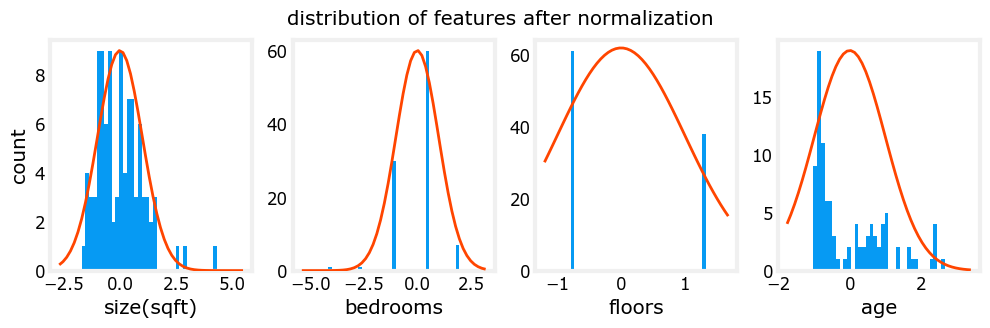

In [115]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()

Notice, above, the range of the normalized data (x-axis) is centered around zero and roughly +/- 2. Most importantly, the range is similar for each feature.

In [116]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.6e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

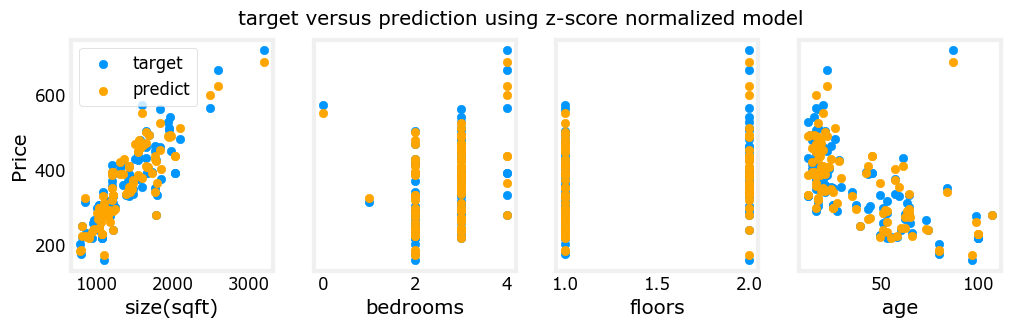

In [119]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color='orange', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()